<a href="https://colab.research.google.com/github/flaviagaia/flaviagaia/blob/main/KNN_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmo KNN em Python**

https://minerandodados.com.br/machine-learning-na-pratica-knn-python/
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1001541&gclid=Cj0KCQjwwNWKBhDAARIsAJ8HkhfMQFUuKkYdS0uBkQnCpx6a7EJHH-NHQyFg1lSpOhWuFxWak_uv30EaAswMEALw_wcB

O KNN (K-Nearest Neighbor) é um algoritmo que pode ser usado tanto para classificação como regressão. Seu objetivo é determinar a qual grupo uma determinada amostra vai pertencer com base nas amostras vizinhas.

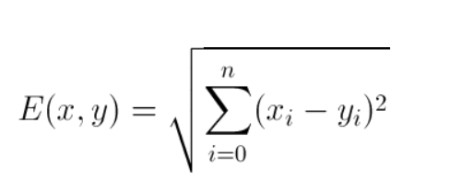

**Aplicando o KNN na Base de Dados Wine (amostras de vinho)**

Base de dados:

https://archive.ics.uci.edu/ml/datasets/wine – UCI machine learning repository.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine – módulo do Sklearn que possui alguns conjuntos de dados.

Nesse conjunto de dados, temos os resultados de uma análise química de vinhos cultivados na região da Itália, a tarefa é classificar o vinho em três tipos distintos (0,1 ou 2).

In [ ]:
# Bibliotecas
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Base de dados
wine = datasets.load_wine()

In [ ]:
# Criando o DataFrame
df_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)
# Criando a coluna com os valores da variável target.
df_wine['class'] = wine.target

In [ ]:
# Vizualização com transposição
df_wine.head().T

,0,1,2,3,4
alcohol,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
total_phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.80,4.32


In [ ]:
# Informações
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [ ]:
# Quantidade de amostras por classe:
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [ ]:
# Separando os dados de treino e teste, 30% para teste e 70% para treino do modelo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('class',axis=1), df_wine['class'], test_size=0.3)

In [ ]:
# Instanciando o Classificador
from sklearn.neighbors import KNeighborsClassifier
# Definindo o número de vizinhos
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Aplicar nossos dados de treino ao algoritmo KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Executando KNN com a base de testes, predict() para prever os valores para os dados de teste
resultado = knn.predict(X_test)
resultado

array([1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0,
       1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# **Analisando e validando os resultados obtidos**

In [ ]:
# Matriz de Confusão: tabela que mostra as frequências de classificação para cada classe do modelo
print(pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        12   2   0   14
1         2  19   3   24
2         1   7   8   16
All      15  28  11   54


Dos 15 valores que o modelo previu como sendo da classe 0, 14 elementos foram classificados corretamente e 1 foi classificado como sendo da classe 2, ou seja, nesse caso o modelo errou.

In [ ]:
# Métricas de classificação
from sklearn import metrics
print(metrics.classification_report(y_test,resultado,target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.80      0.86      0.83        14
     class_1       0.68      0.79      0.73        24
     class_2       0.73      0.50      0.59        16

    accuracy                           0.72        54
   macro avg       0.74      0.72      0.72        54
weighted avg       0.72      0.72      0.71        54



Observando a tabela acima podemos tirar algumas informações úteis, como a accuracy que diz quanto o modelo acertou das previsões possíveis.

# **Otimizando o parâmetro k utilizando o GridSearch:**

In [ ]:
from sklearn.model_selection import GridSearchCV

Lista com valores de 1 a 30 para testar qual será o melhor valor para o parâmetro K.

In [ ]:
# Definindo a lista de valores.
k_list = list(range(1,31))

In [ ]:
# Colocando os valores em um dicionário
parametros = dict(n_neighbors=k_list)

In [ ]:
# Instanciando o objeto GridSearch
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

No código acima passa o modelo, a lista com os valores para o número de vizinhos, cv (número de dobras para a validação cruzada) e o scoring que é uma das métricas de avaliação dos modelos de classificação.

In [ ]:
# Treinando o objeto:
grid.fit(df_wine.drop('class',axis=1),df_wine['class'])

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# Qual é o melhor valor para o parâmetro K?
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

Melhores parametros {'n_neighbors': 1} com o valor de acurácia 0.7250793650793651 


In [ ]:
#Visualização gráfica

plt.figure(figsize=(10,6))
plt.plot(k_list, scoring,color='red',linestyle='dashed',marker='o')

NameError: ignored

<Figure size 720x432 with 0 Axes>